In [ ]:
## Tumor Detection - Model Training and Prediction
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
from PIL import Image
import time
import cv2
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [ ]:
#these are the libraries for the more complex neural networks
import tensorflow as tf
import tensorflow.keras as keras
import keras.optimizers as optimizers
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, concatenate, MaxPool2D, UpSampling2D
from ipywidgets import interact, IntSlider
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Brain Tumor Data Details
The data set for this project is split into two parts:
* `labels` -  all of the classes for our images
* `image_data` - two-dimensional representations of our images.

The corresponding index of an image in `labels` will be marked `1` if the person has a brain tumor, and `0` if they don't.



In [ ]:
#Load your dataset
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor_labels.npy"

### pre-loading all data of interest
image_data = np.load('tumor.npy')
labels = np.load('tumor_labels.npy')

tumor.npy.3         100%[===================>]  16.29M  58.1MB/s    in 0.3s    
tumor_labels.npy.3  100%[===================>]   2.10K  --.-KB/s    in 0.002s  


(253, 150, 150, 3)


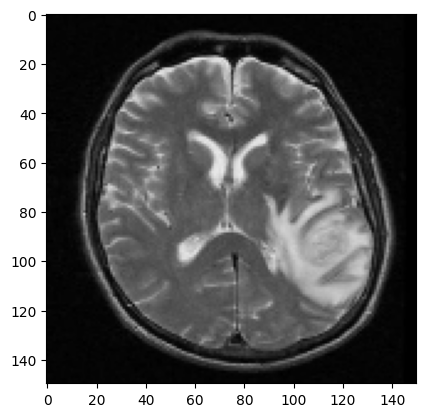

In [ ]:
print(image_data.shape)
plt.imshow(image_data[15])

#Data Pre Processing

Grey Scale
Normalize the Data
Data Augmentation
Flatten the Data

(253, 150, 150, 3)


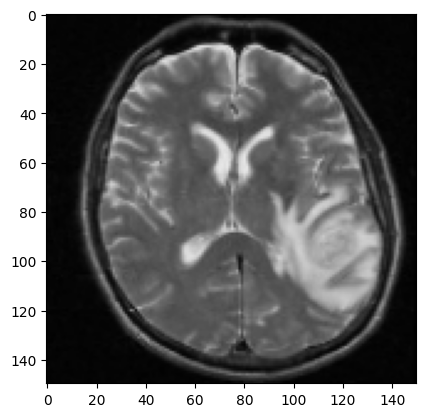

In [ ]:
cropped_images = []
for img in image_data:
  thresh = (img[:, :, 0]+img[:,:,1]+img[:,:,2])/3
#  img = color.rgb2gray(img)
  # Coordinates of non-black pixels.
  coords = np.argwhere(thresh > 10)

  # Bounding box of non-black pixels.
  x0, y0 = coords.min(axis=0)
  x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top

  # Get the contents of the bounding box.
  img = img[x0:x1, y0:y1]
  img = cv2.resize(img, (150, 150))
  cropped_images.append(img)
plt.imshow(cropped_images[15])
print(np.shape(cropped_images))

(253, 150, 150, 3)


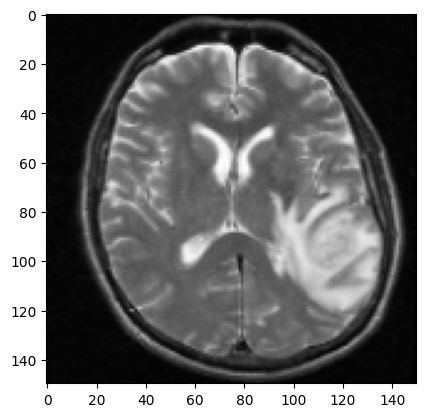

In [ ]:
normal = []
for img in cropped_images:
  normal_image = (img-np.min(img))/(np.max(img)-np.min(img))
  normal.append(normal_image)
plt.imshow(normal[15], cmap = 'gray' )
print(np.shape(normal))

In [ ]:
## Data Augmentation by horizontal Flipping.
aug_images = []
for img in normal:
  aug = np.fliplr(img)
  aug_images.append(aug)
for img in normal:
  aug_images.append(img)
aug_Labels = np.append(labels,labels)
print(np.shape(aug_images))

(506, 150, 150, 3)


(506, 150, 150)


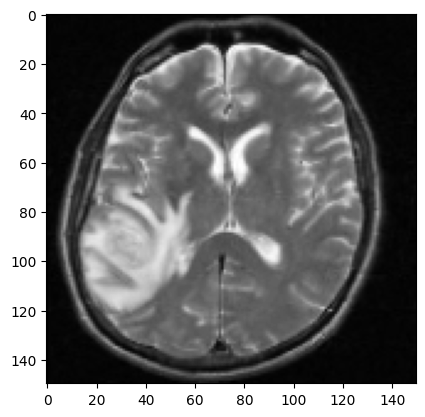

In [ ]:
grey_images = []
for img in aug_images:
  grey_images.append(color.rgb2gray(img))
print(np.shape(grey_images))
plt.imshow(grey_images[15],cmap="gray")

(506, 150, 150, 3)
(506,)


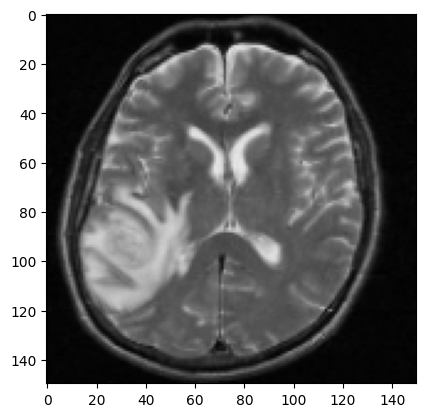

In [ ]:
from numpy.ma.core import reshape
aug_images1 = []
for img in cropped_images:
  img = np.fliplr(img)
  img = cv2.resize(img, (150, 150))
  aug_images1.append(img)
for img in cropped_images:
  img = cv2.resize(img, (150, 150))
  aug_images1.append(img)
#aug_images1 = np.reshape(aug_images1,(506,224,224,3))
print(np.shape(aug_images1))
print(np.shape(aug_Labels))
plt.imshow(aug_images1[15])

In [ ]:
# Flattening of Input Data
flat_images = []
for img in grey_images:
  flat_images.append(img.flatten())
print(np.shape(flat_images))

(506, 22500)


In [ ]:
# Data Partition
trainX, testX, trainY, testY = train_test_split(flat_images,aug_Labels,test_size = 0.2, random_state = 50)
print(np.shape(trainX))

(404, 22500)


# Making Models and Optimizing them

In [ ]:
# make a for loop around the KNC to test differnt number of neighbors
#make graph (num of neighbors, accuracy)
#from sklearn.metrics import accuracy_score
neighbors_list = range(3,51,2)
KNC_accuracy = []
KNC_recall = []
KNC_F1 = []
for i in neighbors_list:
  classifier = KNC(n_neighbors= i)
  classifier.fit(trainX,trainY)
  y_pred = classifier.predict(testX)
  KNC_accuracy.append(accuracy_score(testY, y_pred))
  KNC_recall.append(recall_score(testY, y_pred))
  KNC_F1.append(f1_score(testY, y_pred))



In [ ]:
plt.subplot(1,3,1)
plt.scatter(neighbors_list, KNC_accuracy, color = 'blue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.subplot(1,3,2)
plt.scatter(neighbors_list, KNC_recall, color = 'red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Sensitivity of detection')
plt.subplot(1,3,3)
plt.scatter(neighbors_list, KNC_F1, color = 'green')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
# HW task:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

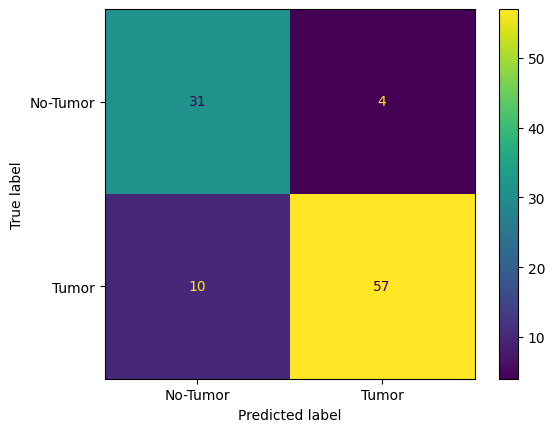

              precision    recall  f1-score   support

    No-Tumor       0.76      0.89      0.82        35
       Tumor       0.93      0.85      0.89        67

    accuracy                           0.86       102
   macro avg       0.85      0.87      0.85       102
weighted avg       0.87      0.86      0.86       102



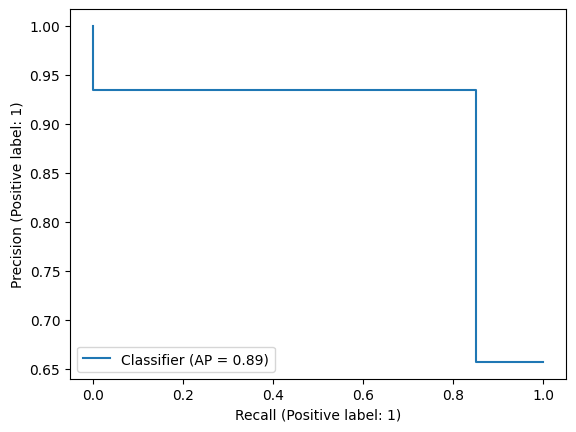

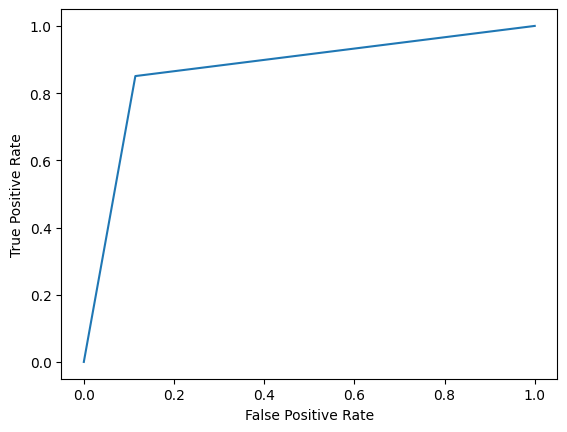

In [ ]:
#Best KNC Model
classes = ['No-Tumor', 'Tumor']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay,roc_curve,RocCurveDisplay
KNCclassifier = KNC(n_neighbors = 5)
KNCclassifier.fit(trainX,trainY)
y_pred = KNCclassifier.predict(testX)
cm_knc= confusion_matrix(testY,y_pred, labels=KNCclassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knc,display_labels=classes)
disp.plot()
plt.show()
cr_knc = classification_report(testY, y_pred,
	target_names=classes)
print(cr_knc)
PrecisionRecallDisplay.from_predictions(testY, y_pred)
plt.show()
fpr, tpr, _ = roc_curve(testY, y_pred, pos_label=KNCclassifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

              precision    recall  f1-score   support

    No-Tumor       0.53      0.86      0.65        35
       Tumor       0.89      0.60      0.71        67

    accuracy                           0.69       102
   macro avg       0.71      0.73      0.68       102
weighted avg       0.76      0.69      0.69       102



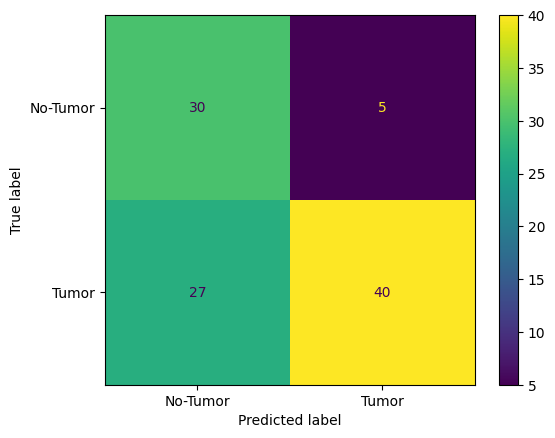

In [ ]:
# Naive Bayes Classifier
NBclassifier = GaussianNB();
NBclassifier.fit(trainX, trainY)

# predicting test set results
y_pred = NBclassifier.predict(testX)

# making the confusion matrix
cm = confusion_matrix(testY, y_pred)
print(classification_report(testY, y_pred,
	target_names=classes))
cm_nb= confusion_matrix(testY,y_pred, labels=NBclassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=classes)
disp.plot()
plt.show()

              precision    recall  f1-score   support

    No-Tumor       0.78      0.71      0.75        35
       Tumor       0.86      0.90      0.88        67

    accuracy                           0.83       102
   macro avg       0.82      0.80      0.81       102
weighted avg       0.83      0.83      0.83       102



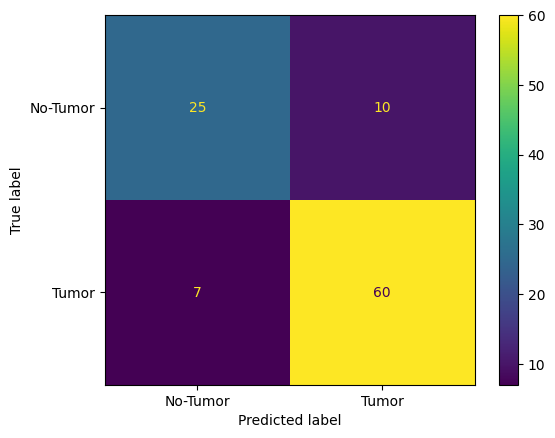

In [ ]:
# LOgistics Regression Model
LRclassifier = LogisticRegression(max_iter=500)
LRclassifier.fit(trainX,trainY)

y_pred = LRclassifier.predict(testX)
cm = confusion_matrix(testY, y_pred)
print(classification_report(testY, y_pred,
	target_names=classes))
cm_LR= confusion_matrix(testY,y_pred, labels=LRclassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
!pip install XGboost
import xgboost as xgb

In [ ]:
# XGBoost (different learning rate)
#Optimitze the algorithm using leaning rate
learning_rate_range = np.arange(0.01, 1, 0.1)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgbclassifier = xgb.XGBClassifier(eta = lr)
    xgbclassifier.fit(trainX, trainY)
    train_XG.append(xgbclassifier.score(trainX, trainY))
    test_XG.append(xgbclassifier.score(testX, testY))
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

              precision    recall  f1-score   support

    No-Tumor       0.97      0.83      0.89        35
       Tumor       0.92      0.99      0.95        67

    accuracy                           0.93       102
   macro avg       0.94      0.91      0.92       102
weighted avg       0.93      0.93      0.93       102



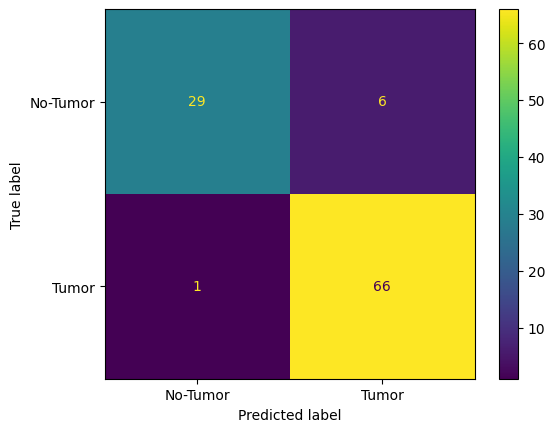

In [ ]:
#Best XG Boost Classifier
classes = ['No-Tumor', 'Tumor']
xgbclassifier = xgb.XGBClassifier(eta = 0.41)
xgbclassifier.fit(trainX, trainY)
y_pred = xgbclassifier.predict(testX)
cm = confusion_matrix(testY, y_pred)
print(classification_report(testY, y_pred,
	target_names=classes))
cm_xgb= confusion_matrix(testY,y_pred, labels=xgbclassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
# Optimize Random Forest Model based on number of estimators. estimators_list = range(10,200,10)
RF_accuracy = []
RF_recall = []
RF_F1 = []
for i in estimators_list:
  RFclassifier = RandomForestClassifier(n_estimators=i, random_state=42)
  RFclassifier.fit(trainX, trainY)
  y_pred = RFclassifier.predict(testX)
  RF_accuracy.append(accuracy_score(testY, y_pred))
  RF_recall.append(recall_score(testY, y_pred))
  RF_F1.append(f1_score(testY, y_pred))

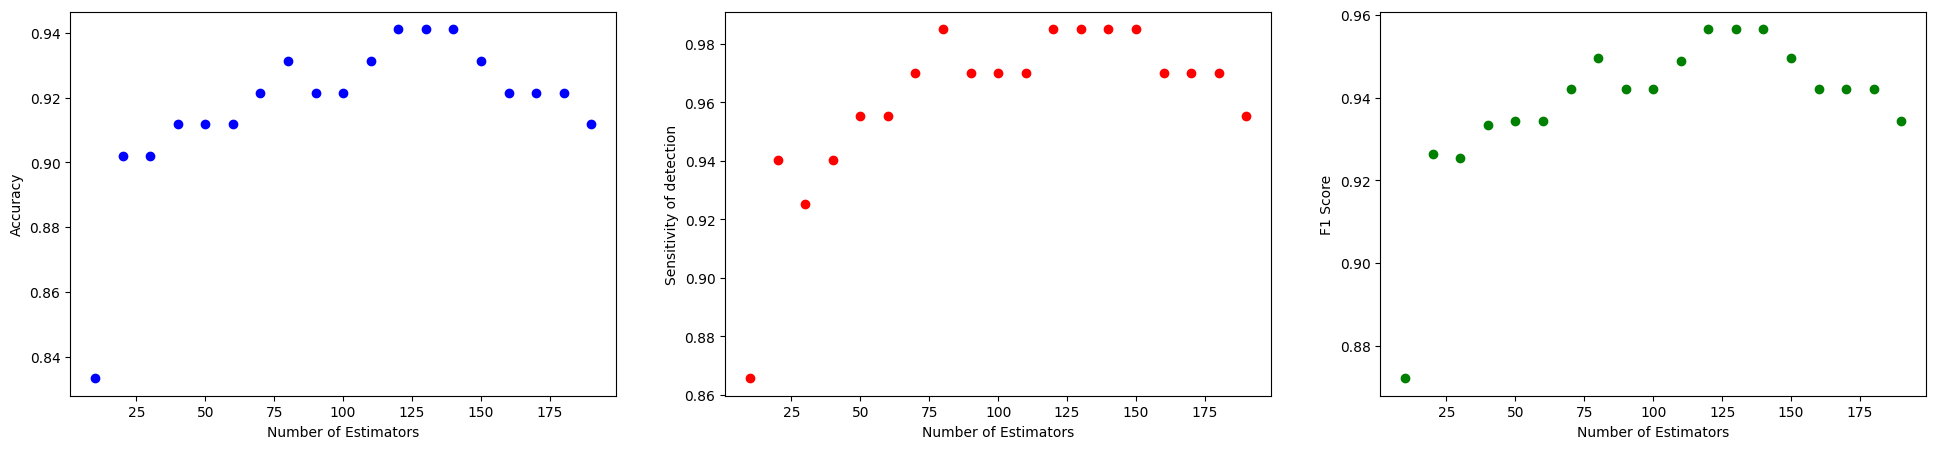

In [ ]:
plt.subplot(1,3,1)
plt.scatter(estimators_list, RF_accuracy, color = 'blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.subplot(1,3,2)
plt.scatter(estimators_list, RF_recall, color = 'red')
plt.xlabel('Number of Estimators')
plt.ylabel('Sensitivity of detection')
plt.subplot(1,3,3)
plt.scatter(estimators_list, RF_F1, color = 'green')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

#Feature Selection
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py

In [ ]:
#First thing is to make a random forect classifier
#Optimize the random forect classifier(number of estimators)
#Use the feature importance from the link


              precision    recall  f1-score   support

    No-Tumor       0.97      0.86      0.91        35
       Tumor       0.93      0.99      0.96        67

    accuracy                           0.94       102
   macro avg       0.95      0.92      0.93       102
weighted avg       0.94      0.94      0.94       102



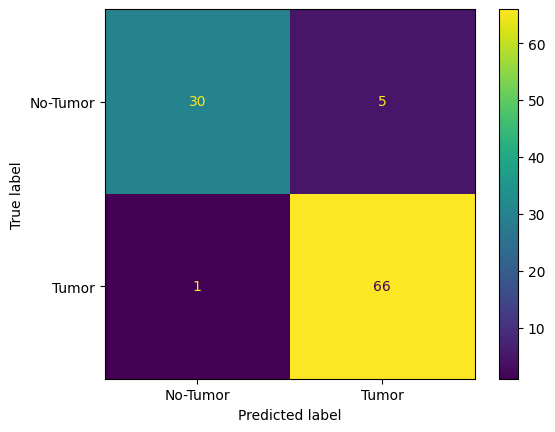

In [ ]:
classes = ['No-Tumor', 'Tumor']
RFclassifier= RandomForestClassifier(n_estimators=125, random_state=42)
RFclassifier.fit(trainX, trainY)
y_pred = RFclassifier.predict(testX)
cm = confusion_matrix(testY, y_pred)
print(classification_report(testY, y_pred,
	target_names=classes))
cm_RF= confusion_matrix(testY,y_pred, labels=RFclassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF,display_labels=classes)
disp.plot()
plt.show()


[10120  9518  9669  2054 10280  2053  1599  6881  3036]


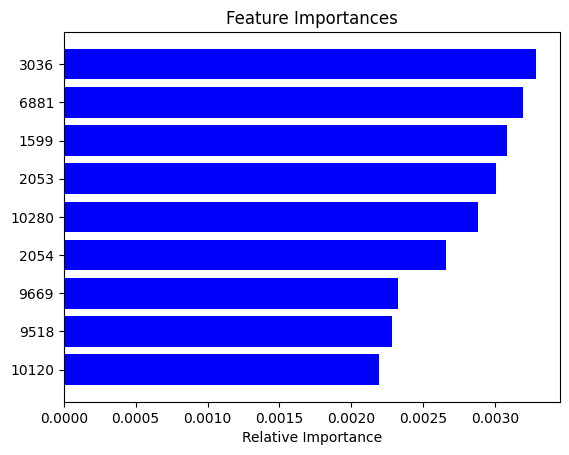

In [ ]:
#Pixel Importance
importances = RF.feature_importances_
indices = np.argsort(importances)
top10 = []
top10 = indices[22491:22500]
print (top10)
features = []
features = trainX
plt.title('Feature Importances')
plt.barh(range(len(top10)), importances[top10], color='b', align='center')
plt.yticks(range(len(top10)),[i for i in top10])
plt.xlabel('Relative Importance')

plt.show()

Elapsed time to compute the importances: 0.023 seconds


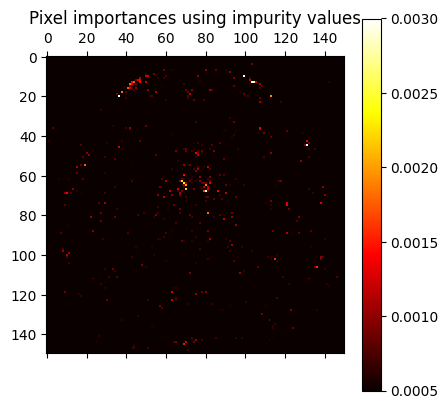

In [ ]:
# Heat Map of the pixel Importance
import time

import matplotlib.pyplot as plt

start_time = time.time()
img_shape = grey_images[309].shape
importances = RFclassifier.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.clim(0.0005,0.003)#change the scaling of the color bar so that anything above 0.003 is very apparent as white
plt.show()


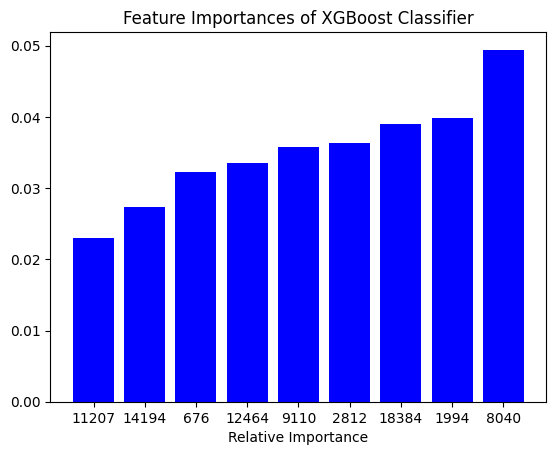

Elapsed time to compute the importances: 0.000 seconds


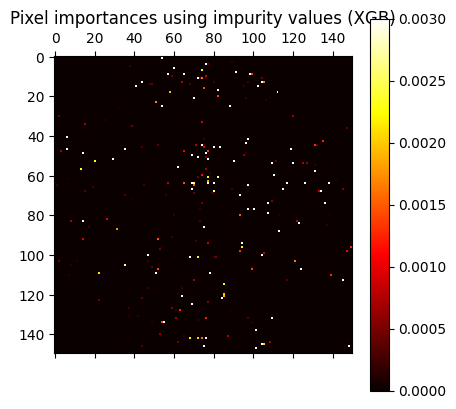

In [ ]:
importances = xgbclassifier.feature_importances_
indices = np.argsort(importances)
top10 = []
top10 = indices[22491:22500]
features = []
features = trainX
plt.title('Feature Importances of XGBoost Classifier')
plt.bar(range(len(top10)), importances[top10], color='b', align='center')
plt.xticks(range(len(top10)),[i for i in top10])
plt.xlabel('Relative Importance')
plt.show()
start_time = time.time()
img_shape = grey_images[309].shape
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values (XGB)")
plt.colorbar()
plt.clim(0,0.003)#change the scaling of the color bar so that anything above 0.003 is very apparent as white
plt.show()

Elapsed time to compute the importances: 0.000 seconds


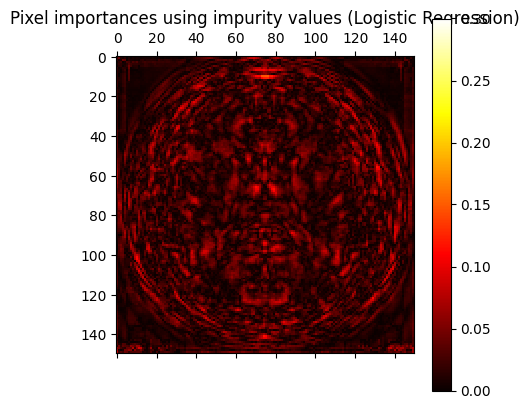

In [ ]:
importances = abs(LRclassifier.coef_)
start_time = time.time()
img_shape = grey_images[309].shape
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values (Logistic Regression)")
plt.colorbar()
plt.clim(0,0.3)#change the scaling of the color bar so that anything above 0.003 is very apparent as white
plt.show()

#Neural Networks


In [ ]:
layers = [(10), (10, 10), (10, 10, 10),(10, 10, 10, 10), (10, 10, 10, 10, 10), (100), (100, 100), (100,100, 100), (100,100,100,100), (100, 100, 100,100,100), (500), (500, 500), (500, 500, 500), (500, 500, 500, 500)]#add more to this
acc = []
for i in layers:
  MLP = MLPClassifier(hidden_layer_sizes = i, random_state= 42)
  MLP.fit(trainX, trainY)
  y_pred = MLP.predict(testX)
  a = f1_score(testY, y_pred)
  acc.append(a)
  print('For layers'+ str(i) + 'accuracy is' + str(a))


For layers10accuracy is0.7928994082840237


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For layers(10, 10)accuracy is0.8633093525179857
For layers(10, 10, 10)accuracy is0.11267605633802817
For layers(10, 10, 10, 10)accuracy is0.7928994082840237
For layers(10, 10, 10, 10, 10)accuracy is0.8496732026143792


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For layers100accuracy is0.888888888888889
For layers(100, 100)accuracy is0.8461538461538461
For layers(100, 100, 100)accuracy is0.8121212121212121
For layers(100, 100, 100, 100)accuracy is0.8378378378378379
For layers(100, 100, 100, 100, 100)accuracy is0.8400000000000001
For layers500accuracy is0.8076923076923077
For layers(500, 500)accuracy is0.45977011494252873
For layers(500, 500, 500)accuracy is0.5106382978723404
For layers(500, 500, 500, 500)accuracy is0.8552631578947368


In [ ]:
layers = [(100)]#add more to this
acc = []
for i in layers:
  MLP = MLPClassifier(hidden_layer_sizes = i, random_state= 42)
  MLP.fit(trainX, trainY)
  y_pred = MLP.predict(testX)
  a = accuracy_score(testY, y_pred)
  acc.append(a)
  print('For layers'+ str(i) + 'accuracy is' + str(a))
  cm = confusion_matrix(testY, y_pred)
  print(cm)
  print(classification_report(testY, y_pred,
	target_names=classes))

For layers100accuracy is0.8431372549019608
[[22 13]
 [ 3 64]]
              precision    recall  f1-score   support

    No-Tumor       0.88      0.63      0.73        35
       Tumor       0.83      0.96      0.89        67

    accuracy                           0.84       102
   macro avg       0.86      0.79      0.81       102
weighted avg       0.85      0.84      0.84       102



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Tensor Flow
https://www.tensorflow.org/tutorials/images/cnn


In [ ]:
#using 2d images for tensorflow
Xtrain_tf, Xtest_tf, ytrain_tf, ytest_tf = train_test_split(grey_images,aug_Labels,test_size = 0.2, random_state = 50)
Xtrain_tf = np.reshape(Xtrain_tf,[404,150,150,1])
Xtest_tf = np.reshape(Xtest_tf,[102,150,150,1])
print(np.shape(ytrain_tf))
print(np.shape(Xtest_tf))

(404,)
(102, 150, 150, 1)


In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
  # i'm sorry for this function's code. i am so sorry.
  history = history.history
  history.update({'epoch':list(range(len(history['val_accuracy'])))})
  history = pd.DataFrame.from_dict(history)

  best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

  if not ax:
    f, ax = plt.subplots(1,1)
  sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
  sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
  ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
  ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
  ax.legend(loc = 1)
  ax.set_ylim([0.01, 1])

  ax.set_xlabel(xlabel)
  ax.set_ylabel('Accuracy (Fraction)')

  plt.show()

In [ ]:
perceptron = Sequential()
perceptron.add(Flatten(input_shape = (150, 150,1)))
perceptron.add(Dense(units = 128, activation = 'relu'))
perceptron.add(Dense(units = 1, activation = 'softmax'))

perceptron.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                   metrics=['accuracy'])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+00 - val_accuracy: 0.6569
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6015 - val_loss: 0.0000e+

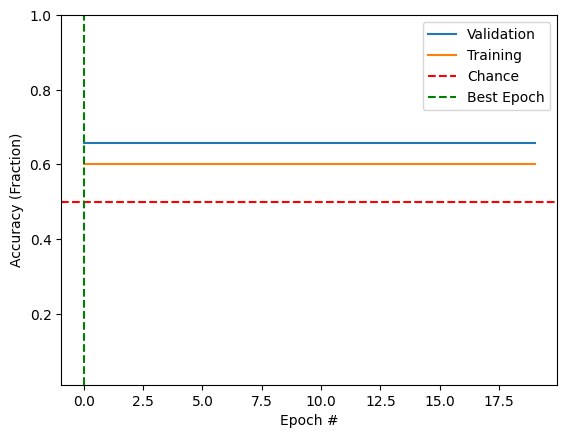

In [ ]:
history = perceptron.fit(Xtrain_tf, ytrain_tf, epochs= 20, validation_data=(Xtest_tf, ytest_tf))
plot_acc(history)


In [ ]:
import tensorflow as tf
# Define the model
classes = ['No-Tumor', 'Tumor']
CNNmodel = tf.keras.Sequential([
  tf.keras.layers.Conv2D(75, (2,2), strides = 2, activation='relu', input_shape=(150, 150,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
CNNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = CNNmodel.fit(Xtrain_tf, ytrain_tf, epochs= 40, validation_data=(Xtest_tf, ytest_tf))

Epoch 1/40
13/13 [==============================] - 4s 44ms/step - loss: 1.4463 - accuracy: 0.5965 - val_loss: 0.5675 - val_accuracy: 0.6667
Epoch 2/40
13/13 [==============================] - 0s 14ms/step - loss: 0.5488 - accuracy: 0.7079 - val_loss: 0.4665 - val_accuracy: 0.7843
Epoch 3/40
13/13 [==============================] - 0s 13ms/step - loss: 0.4998 - accuracy: 0.7475 - val_loss: 0.9412 - val_accuracy: 0.4412
Epoch 4/40
13/13 [==============================] - 0s 13ms/step - loss: 0.4814 - accuracy: 0.7351 - val_loss: 0.4223 - val_accuracy: 0.8137
Epoch 5/40
13/13 [==============================] - 0s 13ms/step - loss: 0.3592 - accuracy: 0.8366 - val_loss: 0.6236 - val_accuracy: 0.6275
Epoch 6/40
13/13 [==============================] - 0s 13ms/step - loss: 0.2880 - accuracy: 0.8787 - val_loss: 0.3429 - val_accuracy: 0.8922
Epoch 7/40
13/13 [==============================] - 0s 13ms/step - loss: 0.2333 - accuracy: 0.9109 - val_loss: 0.3231 - val_accuracy: 0.8824
Epoch 8/40
13

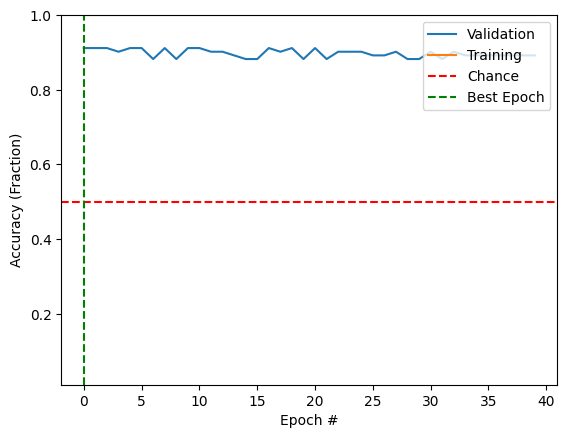

In [ ]:
plot_acc(history)

In [ ]:
print(np.shape(Xtest_tf))
testing_image = Xtest_tf[0]
print(np.shape(Xtest_tf)[3])
testing_image2 = np.reshape(testing_image,(1,150,150,1))

(102, 150, 150, 1)
1


In [ ]:
CNNmodel.predict(testing_image2)

1/1 [==============================] - 0s 75ms/step


array([[4.1466592e-05, 9.9995852e-01]], dtype=float32)

Epoch 1/14
13/13 [==============================] - 4s 42ms/step - loss: 0.9436 - accuracy: 0.5792 - val_loss: 0.6075 - val_accuracy: 0.7059
Epoch 2/14
13/13 [==============================] - 0s 14ms/step - loss: 0.6132 - accuracy: 0.6931 - val_loss: 0.4749 - val_accuracy: 0.7745
Epoch 3/14
13/13 [==============================] - 0s 13ms/step - loss: 0.4630 - accuracy: 0.7822 - val_loss: 0.5098 - val_accuracy: 0.7647
Epoch 4/14
13/13 [==============================] - 0s 13ms/step - loss: 0.3706 - accuracy: 0.8614 - val_loss: 0.3858 - val_accuracy: 0.7843
Epoch 5/14
13/13 [==============================] - 0s 13ms/step - loss: 0.3149 - accuracy: 0.8688 - val_loss: 0.3658 - val_accuracy: 0.8431
Epoch 6/14
13/13 [==============================] - 0s 13ms/step - loss: 0.2512 - accuracy: 0.9158 - val_loss: 0.4070 - val_accuracy: 0.7843
Epoch 7/14
13/13 [==============================] - 0s 14ms/step - loss: 0.1934 - accuracy: 0.9530 - val_loss: 0.2951 - val_accuracy: 0.9216
Epoch 8/14
13

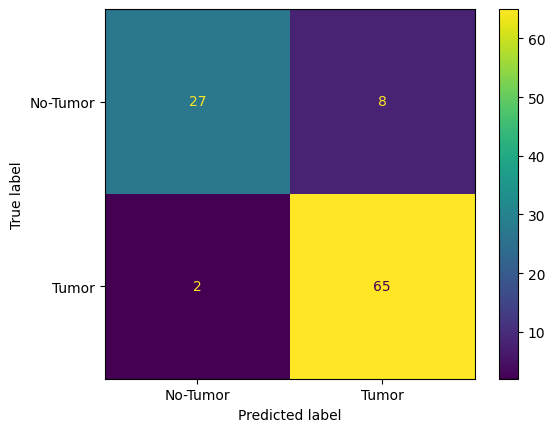

In [ ]:
CNNmodel.fit(Xtrain_tf, ytrain_tf, epochs= 14, validation_data=(Xtest_tf, ytest_tf))
ypred = CNNmodel.predict(Xtest_tf)
y_pred = np.argmax(ypred, axis=1)
#true_classes = np.argmax(ytest_Vgg, axis=1)
print(confusion_matrix(ytest_tf, y_pred))
report = classification_report(ytest_tf, y_pred, target_names=classes)
print(report)
print ('accuracy is' + str(accuracy_score(ytest_tf, y_pred)))
print ('Recall is' + str(recall_score(ytest_tf, y_pred)))
print ('F1 Score is' + str(f1_score(ytest_tf, y_pred)))
cm_cnn= confusion_matrix(ytest_tf,y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
!pip install tf-keras-vis tensorflow

import tensorflow as tf
import tensorflow.keras as keras
from tf_keras_vis.saliency import Saliency
from tf_keras_vis import utils as utils
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.7 MB/s eta 0:00:00


(150, 150, 1)


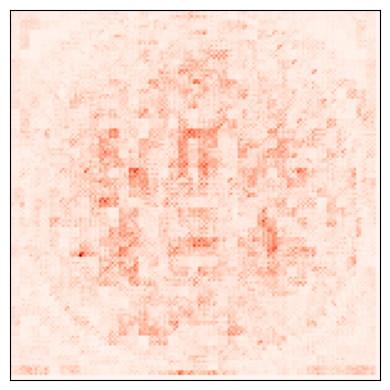

[1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1]


In [ ]:
x = Xtest_tf[2]
print(np.shape(x))
# x = x.reshape((1,) + x.shape)
last_layer = CNNmodel.layers[-1]
last_layer.activation = tf.keras.activations.linear
model = tf.keras.models.Model(inputs=CNNmodel.inputs, outputs=[last_layer.output])
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([1])

#Create Saliency object
saliency = Saliency(model, clone=False)

subplot_args = {
   'nrows': 1,
   'ncols': 1,
   'figsize': (5, 4),
   'subplot_kw': {'xticks': [], 'yticks': []}
}

# Generate saliency map
saliency_map = saliency(score, x, smooth_samples=20, smooth_noise=0.2)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
ax.imshow(saliency_map[0], cmap='Reds')
plt.tight_layout()
plt.show()
print(ytest_tf)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from PIL import Image
import keras
scaled_images = []
#for img in image_data:
#  image = Image.fromarray(img)
#  scaled_images.append(image.resize((224, 224), Image.BILINEAR))
Xtrain_Vgg, Xtest_Vgg, ytrain_Vgg, ytest_Vgg = train_test_split(aug_images1,aug_Labels,test_size = 0.2, random_state = 50)
ytrain_Vgg = np.reshape(ytrain_Vgg,[404,1])
print(np.shape(ytrain_Vgg))
print(np.shape(Xtrain_Vgg))
## Resizing images
Xtrain_Vgg = tf.image.resize(Xtrain_Vgg, (150, 150))
Xtest_Vgg = tf.image.resize(Xtest_Vgg, (150, 150))
## Transforming labels to correct format
ytrain_Vgg = to_categorical(ytrain_Vgg, num_classes=2)
ytest_Vgg = to_categorical(ytest_Vgg, num_classes=2)
# Defining Model
base_model = VGG16(input_shape=Xtrain_Vgg[0].shape,
                   include_top=False,
                   weights="imagenet")
# Freezing Layers
for layer in base_model.layers:
    layer.trainable=False
## Preprocessing input
Xtrain_Vgg = preprocess_input(Xtrain_Vgg)
Xtest_Vgg = preprocess_input(Xtest_Vgg)
# Summary
base_model.summary()
#model = VGG16()
#print(model.summary())
#NUM_CLASSES = 1
#model.layers[0].trainable = False
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False), metrics=["accuracy"])
#model.summary()

(404, 1)
(404, 150, 150, 3)
58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                  

In [ ]:
#Procedure to extract features
def extract_vector_vgg(data_holder):

    vgg_feature_list = []

    for im in data_holder:

        im = image.img_to_array(im)

        img = preprocess_input(np.expand_dims(im.copy(), axis=0))

        vgg_feature = base_model.predict(img)

        vgg_feature_np = np.array(vgg_feature)

        vgg_feature_list.append(vgg_feature_np.flatten())
    return np.array(vgg_feature_list)

1/1 [==============================] - 0s 16ms/step


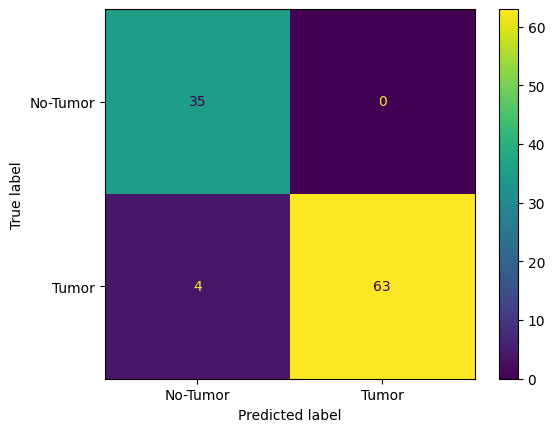

              precision    recall  f1-score   support

    No-Tumor       0.90      1.00      0.95        35
       Tumor       1.00      0.94      0.97        67

    accuracy                           0.96       102
   macro avg       0.95      0.97      0.96       102
weighted avg       0.96      0.96      0.96       102



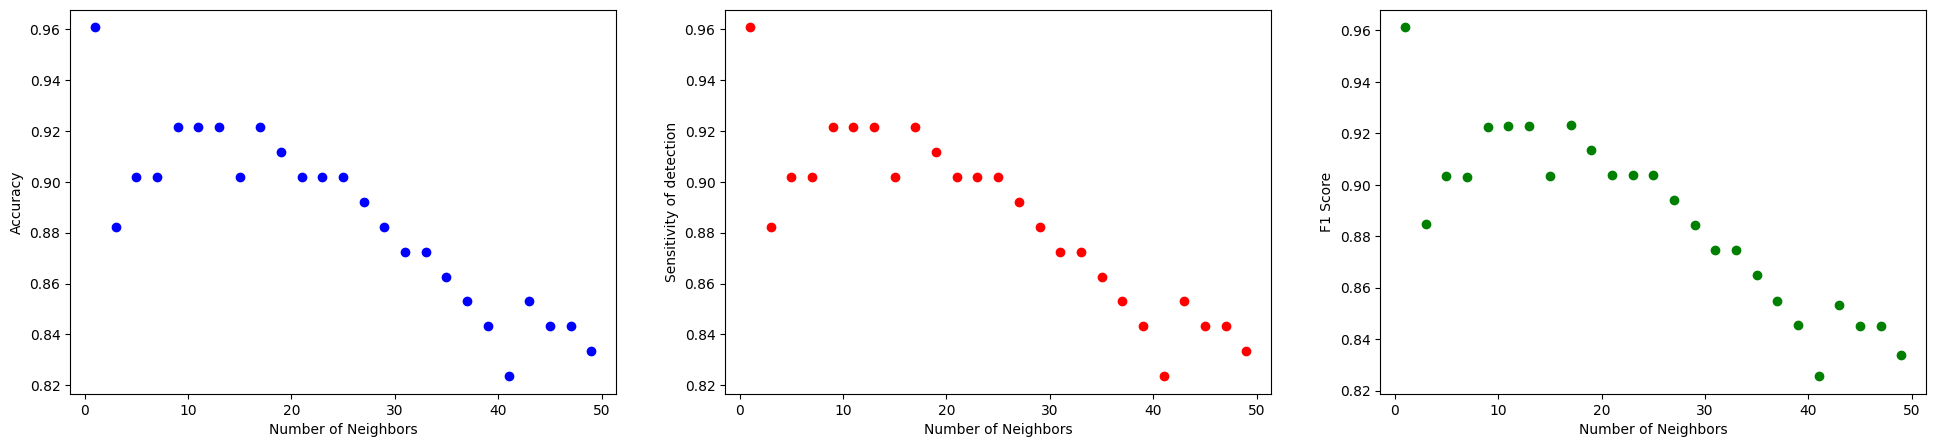

In [ ]:
classes = ['No-Tumor', 'Tumor']
neighbors_list = range(1,51,2)
KNCF_accuracy = []
KNCF_recall = []
KNCF_F1 = []
array = extract_vector_vgg(Xtrain_Vgg)
array1 = extract_vector_vgg(Xtest_Vgg)
for i in neighbors_list:
    KNCFclassifier = KNC(n_neighbors=i)
    KNCFclassifier.fit(array,ytrain_Vgg)
    y_pred = KNCFclassifier.predict(array1)
    KNCF_accuracy.append(accuracy_score(ytest_Vgg, y_pred))
    KNCF_recall.append(recall_score(ytest_Vgg,y_pred,average="weighted"))
    KNCF_F1.append(f1_score(ytest_Vgg, y_pred, average="weighted"))

KNCFclassifier = KNC(n_neighbors=1)
KNCFclassifier.fit(array,ytrain_Vgg)
ypred = KNCFclassifier.predict(array1)
y_pred = np.argmax(ypred, axis=1)
true_classes = np.argmax(ytest_Vgg, axis=1)
import sklearn
#sklearn.preprocessing.LabelBinarizer(y_pred)
cr_kncf = classification_report(true_classes, y_pred, target_names=classes)
#cm_kncf = confusion_matrix(ytest_Vgg, y_pred)
cm_kncf= confusion_matrix(true_classes,y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kncf,display_labels=classes)
disp.plot()
plt.show()
#print(cm_kncf)
print (cr_kncf)
plt.subplot(1,3,1)
plt.scatter(neighbors_list, KNCF_accuracy, color = 'blue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.subplot(1,3,2)
plt.scatter(neighbors_list, KNCF_recall, color = 'red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Sensitivity of detection')
plt.subplot(1,3,3)
plt.scatter(neighbors_list, KNCF_F1, color = 'green')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
# HW task:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

In [ ]:
dump(KNCFclassifier, "KNCF.joblib")

['KNCF.joblib']

In [ ]:
from tensorflow.keras import layers, models
dropout_layer = Dropout(0.2)
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')


VGGclassifier = models.Sequential([
    base_model,
    dropout_layer,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])
# Model Compile
OPT = tf.keras.optimizers.Adam(learning_rate=0.001)
VGGclassifier.compile(
    optimizer=OPT,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Defining Callbacks

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 5,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_auc',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model_history = VGGclassifier.fit(Xtrain_Vgg, ytrain_Vgg, epochs=50, validation_split = 0.2, batch_size=32, callbacks=[es])

Epoch 1/50
11/11 [==============================] - 10s 456ms/step - loss: 2.3760 - accuracy: 0.7059 - val_loss: 1.5754 - val_accuracy: 0.8025
Epoch 2/50
11/11 [==============================] - 1s 93ms/step - loss: 0.2813 - accuracy: 0.9164 - val_loss: 1.4947 - val_accuracy: 0.8889
Epoch 3/50
11/11 [==============================] - 1s 89ms/step - loss: 0.1559 - accuracy: 0.9474 - val_loss: 1.0543 - val_accuracy: 0.8642
Epoch 4/50
11/11 [==============================] - 1s 94ms/step - loss: 0.0995 - accuracy: 0.9659 - val_loss: 1.1346 - val_accuracy: 0.9259
Epoch 5/50
11/11 [==============================] - 1s 90ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 1.0988 - val_accuracy: 0.9259
Epoch 6/50
11/11 [==============================] - 1s 89ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 1.1774 - val_accuracy: 0.9259
Epoch 7/50
11/11 [==============================] - 1s 89ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2409 - val_accuracy: 0.9259
Epoch 8/50


In [ ]:
plot_acc(model_history)

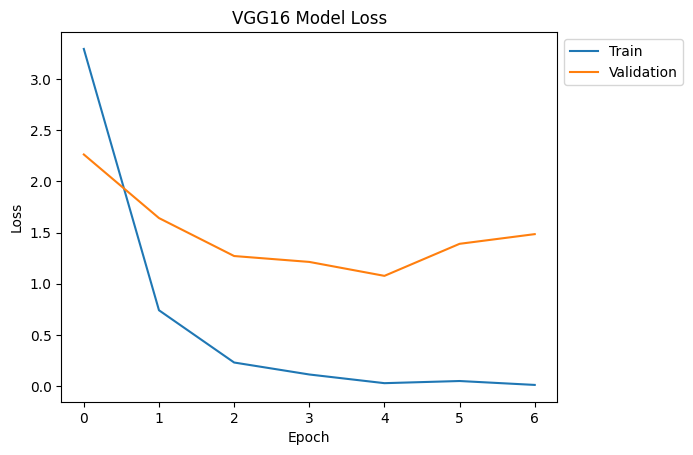

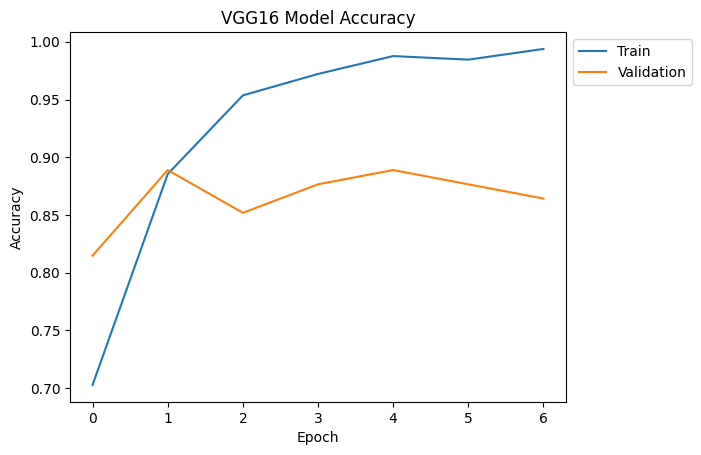

In [ ]:
# Summarize the model loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('VGG16 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()
# Summarize models auc

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
print(np.shape(Xtest_Vgg))


(102, 150, 150, 3)


Epoch 1/10
11/11 [==============================] - 1s 103ms/step - loss: 0.0136 - accuracy: 0.9938 - val_loss: 1.1102 - val_accuracy: 0.9259
Epoch 2/10
11/11 [==============================] - 1s 90ms/step - loss: 0.0183 - accuracy: 0.9969 - val_loss: 1.1306 - val_accuracy: 0.9136
Epoch 3/10
11/11 [==============================] - 1s 89ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.0952 - val_accuracy: 0.9136
Epoch 4/10
11/11 [==============================] - 1s 89ms/step - loss: 0.0546 - accuracy: 0.9752 - val_loss: 1.4482 - val_accuracy: 0.9136
Epoch 5/10
11/11 [==============================] - 1s 89ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 1.3837 - val_accuracy: 0.8765
Epoch 6/10
4/4 [==============================] - 2s 488ms/step
[[32  3]
 [ 3 64]]
              precision    recall  f1-score   support

    No-Tumor       0.91      0.91      0.91        35
       Tumor       0.96      0.96      0.96        67

    accuracy                           0.94    

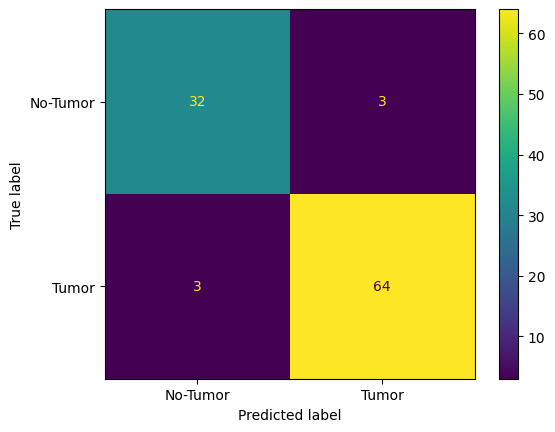

In [ ]:
VGGclassifier.fit(Xtrain_Vgg, ytrain_Vgg, epochs=10, validation_split = 0.2, batch_size=32, callbacks=[es])
classes = ['No-Tumor', 'Tumor']
ypred = VGGclassifier.predict(Xtest_Vgg)
y_pred = np.argmax(ypred, axis=1)
true_classes = np.argmax(ytest_Vgg, axis=1)
print(confusion_matrix(true_classes, y_pred))
report = classification_report(true_classes, y_pred, target_names=classes)
print(report)
cm_vgg= confusion_matrix(true_classes,y_pred, labels =[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vgg,display_labels=classes)
disp.plot()
plt.show()

(150, 150, 3)


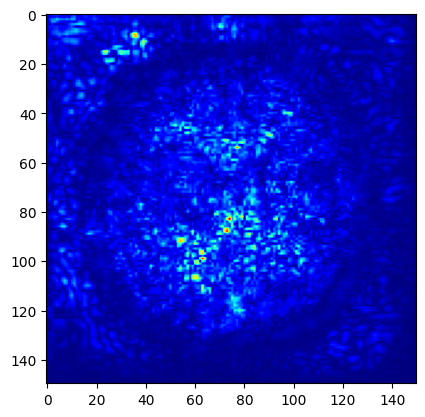

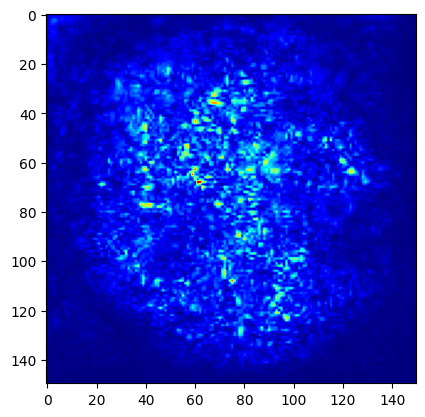

(1, 150, 150)


In [ ]:
x = Xtest_Vgg[3]
x2 = Xtest_Vgg[4]
print(np.shape(x))
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([1])


from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(VGGclassifier,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, x)
saliency_map2 = saliency(score, x2)

# Normalize the saliency map.
## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
#f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

#ax[3].set_title(title, fontsize=16)
plt.imshow(np.squeeze(saliency_map), cmap='jet')
plt.show()
#ax[].axis('off')
plt.imshow(np.squeeze(saliency_map2), cmap='jet')

#plt.tight_layout()
plt.show()
print(np.shape(saliency_map))


#Streamlit Web App



In [ ]:
!pip -q install pyngrok > /dev/null
!pip -q install streamlit > /dev/null
!pip -q install patool > /dev/null

import cv2
import gdown
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import patoolib
import streamlit as st
import tensorflow as tf

from joblib import dump
from joblib import load
from tqdm import tqdm
from pyngrok import ngrok




!ngrok authtoken 2abpxRFnXoTeoaVKiy5UgMVlIgE_2UP3yDDkb8Jwd1Zt7edwQ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
def launch_website():
  print ("Click this link to try your web app:")
  if (ngrok.get_tunnels() != None):
    ngrok.kill()
  public_url = ngrok.connect()
  print(public_url)
  !streamlit run --server.port 80 app.py > /dev/null

In [ ]:
#Image file location
from google.colab import drive
import os
drive.mount('/content/gdrive/', force_remount = True)
%cd gdrive/MyDrive/

Mounted at /content/gdrive/
/content/gdrive/MyDrive


In [ ]:
#dump in all of the best classifiers
dump(KNCclassifier, "KNC.joblib")
dump(NBclassifier,"NB.joblib")
dump(xgbclassifier, "XGB.joblib")
dump(RFclassifier, "RF.joblib")
dump(LRclassifier, "LR.joblib")
dump(CNNmodel, "CNN.joblib")
dump(VGGclassifier, "VGG16.joblib")
dump(KNCFclassifier, "KNCF.joblib")
dump(base_model, "base_model.joblib")

NameError: name 'KNCclassifier' is not defined

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from joblib import load
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image as imge
import keras
def cropping(img):
  thresh = (img[:, :, 0]+img[:,:,1]+img[:,:,2])/3
  # Coordinates of non-black pixels.
  coords = np.argwhere(thresh > 10)
  # Bounding box of non-black pixels.
  x0, y0 = coords.min(axis=0)
  x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top
  # Get the contents of the bounding box.
  img = img[x0:x1, y0:y1]
  img = cv2.resize(img, (150, 150))
  return img
#make sure to load in other models
#KNC_model = load("KNC.joblib")
#NB_model = load("NB.joblib")
#XGB_model = load("XGB.joblib")
#RF_model = load("RF.joblib")
#LR_model = load("LR.joblib")
#CNN_model = load("CNN.joblib")
#VGG16_model = load("VGG16.joblib")
#KNCF_model = load("KNCF.joblib")
#base_model = load("base_model.joblib")
#Classification Models
#KNCC_model= load("KNCC.joblib")
#NBC_model= load("NBC.joblib")
#RFC_model= load("RFC.joblib")
#XGBC_model= load("XGBC.joblib")
#
#

# -- Set page config
apptitle = 'NeuroAID'

st.set_page_config(page_title=apptitle, page_icon=":brain:")
#Image
image = Image.open('NeuroAID//Banner.jpg')
st.image(image)
st.markdown("<h1 style='text-align: center; color: blue;'>Brain Tumor Screening Diagnostics System</h1>", unsafe_allow_html=True)
#st.title(":blue[Brain Tumor Screening Diagnostics System]")
#Text
st.write(" :green[Purpose: This App provides screening level diagnosis for brain tumors based on Magnetic Resonance Imaging (MRI) scans. There are two levels of diagnosis:]")
st.markdown("""
 * Detection: Is there an evidence in the MRI for a presence of a tumor
 * Classification: What type of tumor is present
""")
Data_tab, Diagnostics_tab, Report_tab = st.tabs([" ## Training Data", "## XAI Diagnostics", "## Screening Report"])
#-- sidebar
st.sidebar.markdown("## :blue[Patient Information] ")
selected_patient = st.sidebar.text_input(':green[Name/ID]', value = 'Self')
selected_date = st.sidebar.date_input(':green[Date of Scan]', value="today")
selected_history = st.sidebar.button(':green[Retrieve Previous Scans and Results]')
st.sidebar.markdown("## :blue[Model Selector and Parameters] ")
#-- Choose Diagnosis Type as Detection or Classification
Selected_diagnosis = st.sidebar.selectbox(':green[Diagnosis Type]', ['Detection', 'Classification'])
#-- Choose Model
if (Selected_diagnosis == 'Detection'):
    selected_model = st.sidebar.selectbox(':green[Model]', ['Best Model (KNC-feature)', 'KNC','Naive Bayes','Random Forest', 'Logistic Regression', 'XGBoost','CNN','VGG16', 'KNC-feature'])
else:
    selected_model = st.sidebar.selectbox('Model', ['Best Model (XGBoost)', 'KNC', 'Naive Bayes', 'XGBoost', 'Random Forest', 'VGG16', 'KNC-feature'])
Model_Metrics_Selection = st.sidebar.checkbox(':green[Show Model Performance Metrics]')
st.sidebar.markdown("## :blue[Explainability Parameters]")
#-- Choose Explainability Type
selected_explainability = st.sidebar.radio(':green[Explainability Type]', ['Cohort Level', 'Patient Level'])
#-- Choose Model
if (selected_explainability == 'Cohort Level'):
    selected_ex_display = st.sidebar.selectbox(':green[Display]', ['Feature Importance Pareto', 'Brain Heat Map'])
else:
    selected_ex_display = st.sidebar.selectbox(':green[Display]', ['Tumor Saliency Map', 'Contrast Map'])
with Data_tab:
  image = Image.open("NeuroAID//DS1.jpg")
  st.image(image)
  image = Image.open("NeuroAID//DS2.jpg")
  st.image(image)
with Report_tab:
  if (selected_explainability == 'Cohort Level'):
    if (selected_ex_display == 'Feature Importance Pareto'):
      if (Selected_diagnosis == 'Detection'):
        image = Image.open("NeuroAID//Cohort_D.jpg")
        st.image(image)
      else:
        image = Image.open("NeuroAID//Cohort_C.jpg")
        st.image(image)
  elif (selected_explainability == 'Patient Level'):
    if (selected_ex_display == 'Contrast Map' ):
      if (Selected_diagnosis == 'Detection'):
        image = Image.open("NeuroAID//Patient_D.jpg")
        st.image(image)
      else:
        image = Image.open("NeuroAID//Patient_C.jpg")
        st.image(image)
with Diagnostics_tab:
  if (Selected_diagnosis == 'Detection'):
    #Load selected model
    if (selected_model == 'Best Model (KNC-feature)'):
        Selectedmodel = load("KNCF.joblib")
        Model_option = 3
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_KNCF.jpg")
          st.image(image)
    elif (selected_model == 'KNC'):
        Selectedmodel = load("KNC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_KNC.jpg")
          st.image(image)
    elif (selected_model == 'Naive Bayes'):
        Selectedmodel = load("NB.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_NB.jpg")
          st.image(image)
    elif (selected_model == 'Random Forest'):
        Selectedmodel = load("RF.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_RF.jpg")
          st.image(image)
    elif (selected_model == 'Logistic Regression'):
        Selectedmodel = load("LR.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_LR.jpg")
          st.image(image)
    elif (selected_model == 'XGBoost'):
        Selectedmodel = load("XGB.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_XGB.jpg")
          st.image(image)
    elif (selected_model == 'CNN'):
        Selectedmodel = load("CNN.joblib")
        Model_option = 1
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_CNN.jpg")
          st.image(image)
    elif (selected_model == 'VGG16'):
        Selectedmodel = load("VGG16.joblib")
        Model_option = 2
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_VGG16.jpg")
          st.image(image)
    else:
        Selectedmodel = load("KNCF.joblib")
        Model_option = 3
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_KNCF.jpg")
          st.image(image)
  else:
    #Load selected model
    if (selected_model == 'Best Model (XGBoost)'):
        Selectedmodel = load("XGBC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_XGBC.jpg")
          st.image(image)
    elif (selected_model == 'KNC'):
        Selectedmodel = load("KNCC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_KNCC.jpg")
          st.image(image)
    elif (selected_model == 'Naive Bayes'):
        Selectedmodel = load("NBC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_NBC.jpg")
          st.image(image)
    elif (selected_model == 'Random Forest'):
        Selectedmodel = load("RFC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_RFC.jpg")
          st.image(image)
    elif (selected_model == 'XGBoost'):
        Selectedmodel = load("XGBC.joblib")
        Model_option = 0
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_XGBC.jpg")
          st.image(image)
    elif (selected_model == 'VGG16'):
        Selectedmodel = load("VGG16C.joblib")
        Model_option = 2
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_XGBC.jpg")
          st.image(image)
    else:
        Selectedmodel = load("KNCFC.joblib")
        Model_option = 3
        if (Model_Metrics_Selection):
          st.subheader(':green[Model Performance Metrics]')
          image = Image.open("NeuroAID//Model_KNCC.jpg")
          st.image(image)

  st.divider()

  #SubHeader
  st.subheader(':green[Uplaod the MRI for Screening Diagnosis]')
  st.write(':green[Please use the Browse button below to select the MRI scan file (jpg, png, gif) from your local drive]')
  #File Input
  uploaded_file = st.file_uploader("Upload Image")
  if uploaded_file is not None:
    if (Model_option == 0):
      file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
      image = cv2.imdecode(file_bytes, 1)
      image = cropping (image)
      st.image(image, channels="BGR")
      resize = cv2.resize(image, (150,150))
      gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
      nml = (gray-np.min(gray))/(np.max(gray)-np.min(gray))
      #remove background if it has been on the training data
      flatten = np.reshape(nml, (1,-1))
      #add in if statement here for the type of model
      pred = Selectedmodel.predict(flatten)
      pred_prob = Selectedmodel.predict_proba(flatten)
      if (pred == 3):
        st.write('There is a Pituitary type of tumor detected with a probability of',prob,'%')
      if (pred == 2):
        prob = 100*pred_prob[0][2]
        st.write("<h4 style='text-align: left; color: blue;'>For the uploaded image shown above, selected model was used to perform the screening analysis.</h4>", unsafe_allow_html = True)
        st.write(f"<h4 style='text-align: left; color: orange;'>There is a **Meningioma** type of tumor detected with a probability of {prob:.2f}%.</h4>", unsafe_allow_html=True)
#        st.write("<h4 style='text-align: left; color: orange;'>'There is a Meningioma type of tumor detected with a probability of', prob, '%' </h4>", unsafe_allow_html=True)
#        st.write(##### 'Based on the analysis, there is a :orange[_Meningioma type of tumor_] detected with a probability of' prob '%.')
      if (pred == 1):
        st.write('There is a Glioma type of tumor detected with a probability of',prob,'%')
      if (pred == 0):
        st.write('There is no tumor detected with a probability of',prob,'%')
    elif (Model_option ==1):
      file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
      image = cv2.imdecode(file_bytes, 1)
      image = cropping (image)
      st.image(image, channels="BGR")
      resize = cv2.resize(image, (150,150))
      gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
      nml = (gray-np.min(gray))/(np.max(gray)-np.min(gray))
      #remove background if it has been on the training data
      input = np.reshape(nml, (1,150,150,1))
      #add in if statement here for the type of model
      ypred = Selectedmodel.predict(input)
      pred = np.argmax(ypred, axis=1)
      st.write(pred)
      if pred == 1:
        st.write('Tumor Detected with a probability of')
      if pred == 0:
        st.write('No Tumor Detected with a probability of')
    elif (Model_option ==2):
      file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
      image = cv2.imdecode(file_bytes, 1)
      image = cropping (image)
      st.image(image, channels="BGR")
      resize = cv2.resize(image, (150,150))
  #    gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
      nml = (resize-np.min(image))/(np.max(image)-np.min(image))
      #remove background <-- to do
      input = np.reshape(nml, (1,150,150,3))
      input = tf.image.resize(input, (150, 150))
      input = preprocess_input(input)
      ypred = Selectedmodel.predict(input)
      pred = np.argmax(ypred, axis=1)
      st.write(pred)
      if pred == 1:
        st.write('Tumor Detected with a probability of')
      if pred == 0:
        st.write('No Tumor Detected with a probability of')
    else:
      base_model = load("base_model.joblib")
      file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
      image = cv2.imdecode(file_bytes, 1)
      image = cropping (image)
      st.image(image, channels="BGR")
      resize = cv2.resize(image, (150,150))
  #    gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
      nml = (resize-np.min(image))/(np.max(image)-np.min(image))
      input = np.reshape(nml, (1,150,150,3))
      input = tf.image.resize(input, (150, 150))
      input = preprocess_input(input)
      im = imge.img_to_array(input)
      img = preprocess_input(np.expand_dims(im.copy(), axis=0))
      vgg_feature = base_model.predict(img)
      vgg_feature_np = np.array(vgg_feature)
      array1 = np.array(vgg_feature_np.flatten())
      ypred = Selectedmodel.predict(array1)
      pred = np.argmax(ypred, axis=1)
      st.write(pred)
      if pred == 1:
        st.write('No Tumor Detected with a probability of')
      if pred == 0:
        st.write('No Tumor Detected with a probability of')
  else:
    st.write(':green[If you do not have an image, you can download a sample MRI image from image library,] https://openneuro.org/')




Overwriting app.py


In [ ]:
launch_website()